In [66]:
#Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')

In [67]:
#Input
df = pd.read_csv (r'D:\Universitas Indonesia\Semester 6\Pemodelan dan Pembelajaran Mesin\Code\4.Clustering\dataset.csv')

features = list(df.columns)[1:]
data = df[features]
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [68]:
#Preprocessing
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [69]:
#K-Means
from sklearn.cluster import KMeans
kmeans_parameter = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

silhouette_kmeans = []
sse = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_parameter)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)
    score = silhouette_score(data_scaled, kmeans.labels_)
    silhouette_kmeans.append(score)

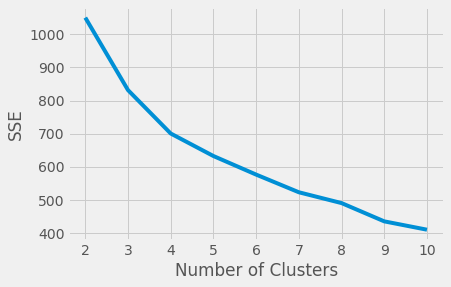

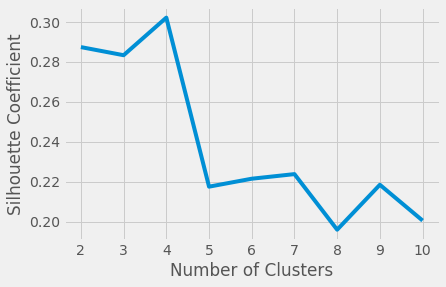

In [70]:
 #Plot Intertia
 plt.style.use("fivethirtyeight")
 plt.plot(range(2, 11), sse)
 plt.xticks(range(2, 11))
 plt.xlabel("Number of Clusters")
 plt.ylabel("SSE")
 plt.show()

#Plot Silhouettes
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_kmeans)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [71]:
#Single link
from sklearn.cluster import AgglomerativeClustering

silhouette_singlelink = []

for k in range(2, 11):
    singlelink = AgglomerativeClustering(n_clusters=k, linkage="single")
    singlelink.fit(data_scaled)
    score = silhouette_score(data_scaled, singlelink.labels_)
    silhouette_singlelink.append(score)

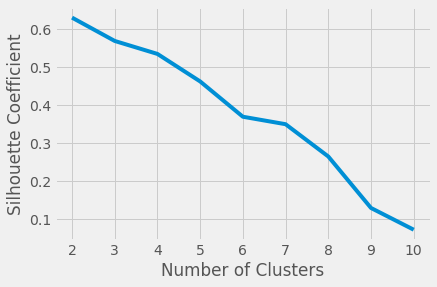

In [72]:
#Plot Silhouettes
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_singlelink)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [73]:
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)

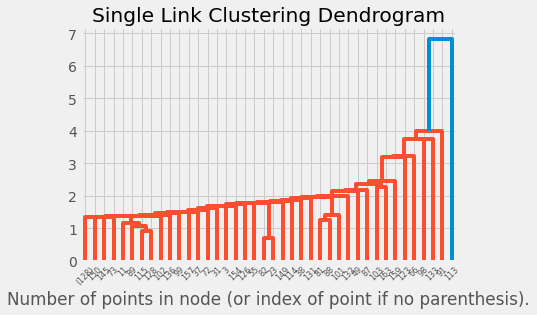

In [74]:
singlelink = AgglomerativeClustering(linkage="single",distance_threshold=0, n_clusters=None)
singlelink.fit(data_scaled)

plt.title('Single Link Clustering Dendrogram')
plot_dendrogram(singlelink, truncate_mode='level', p=30)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [75]:
#Complete link
from sklearn.cluster import AgglomerativeClustering

silhouette_completelink = []

for k in range(2, 11):
    completelink = AgglomerativeClustering(n_clusters=k, linkage="complete")
    completelink.fit(data_scaled)
    score = silhouette_score(data_scaled, completelink.labels_)
    silhouette_completelink.append(score)

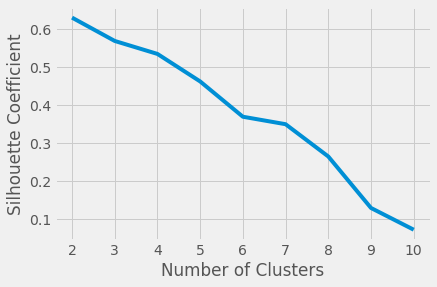

In [76]:
#Plot Silhouettes
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_singlelink)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

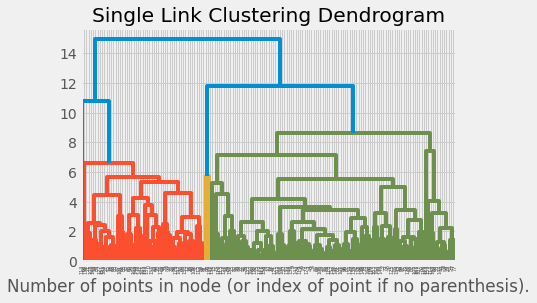

In [61]:
completelink = AgglomerativeClustering(linkage="complete",distance_threshold=0, n_clusters=None)
completelink.fit(data_scaled)

plt.title('Single Link Clustering Dendrogram')
plot_dendrogram(completelink, truncate_mode='level', p=30)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()